In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score

In [2]:
import os
import numpy as np
import pandas as pd
import more_itertools as mit
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
house_data = pd.read_csv("../preprocessed_data/clean_data1.csv")

NameError: name 'pd' is not defined

In [4]:
house_data.head()

,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,Month,DayOfWeek,HourofDay,Day,...,T_stp_heat,Humidity,auxHeat1,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
0,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,0.0,165.0,70.0,0.0,67.0,0.0,41.0,95.0
1,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,30.0,135.0,70.0,0.0,67.0,0.0,41.0,95.0
2,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,300.0,300.0,70.0,0.0,67.0,0.0,41.0,95.0
3,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,135.0,180.0,70.0,0.0,67.0,0.0,41.0,95.0
4,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,0.0,120.0,70.0,0.0,67.0,0.0,41.0,95.0


In [5]:
house_data.drop(labels = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'Month', 'DayOfWeek', 'Day',
                          'HourofDay', 'HvacMode', 'Event', 'Schedule', 'Humidity', 'fan', 'Thermostat_Temperature', 
                          'Thermostat_Motion', 'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion'], axis = 1, inplace = True)

In [6]:
house_data.head()

,T_ctrl,T_stp_heat,auxHeat1,T_out,RH_out
0,70.0,70.0,0.0,41.0,95.0
1,70.0,70.0,30.0,41.0,95.0
2,70.0,70.0,300.0,41.0,95.0
3,70.0,70.0,135.0,41.0,95.0
4,70.0,70.0,0.0,41.0,95.0


In [7]:
house_data = house_data[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out', 'auxHeat1']]

In [8]:
house_data.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,70.0,70.0,41.0,95.0,0.0
1,70.0,70.0,41.0,95.0,30.0
2,70.0,70.0,41.0,95.0,300.0
3,70.0,70.0,41.0,95.0,135.0
4,70.0,70.0,41.0,95.0,0.0


In [9]:
house_data.auxHeat1.value_counts().index

Float64Index([  0.0, 300.0,  90.0, 225.0, 180.0,  15.0, 120.0,  30.0, 240.0,
              270.0,  60.0,  45.0, 105.0,  75.0, 150.0, 135.0, 195.0, 285.0,
              165.0, 210.0, 255.0],
             dtype='float64')

In [10]:
house_data.auxHeat1.value_counts().values

array([42159,  9472,   421,   405,   404,   403,   394,   393,   385,
         382,   380,   378,   376,   375,   368,   368,   367,   360,
         357,   349,   341], dtype=int64)

[Text(0, 0.5, 'Percentage Values'), Text(0.5, 0, 'Target Variable Values')]

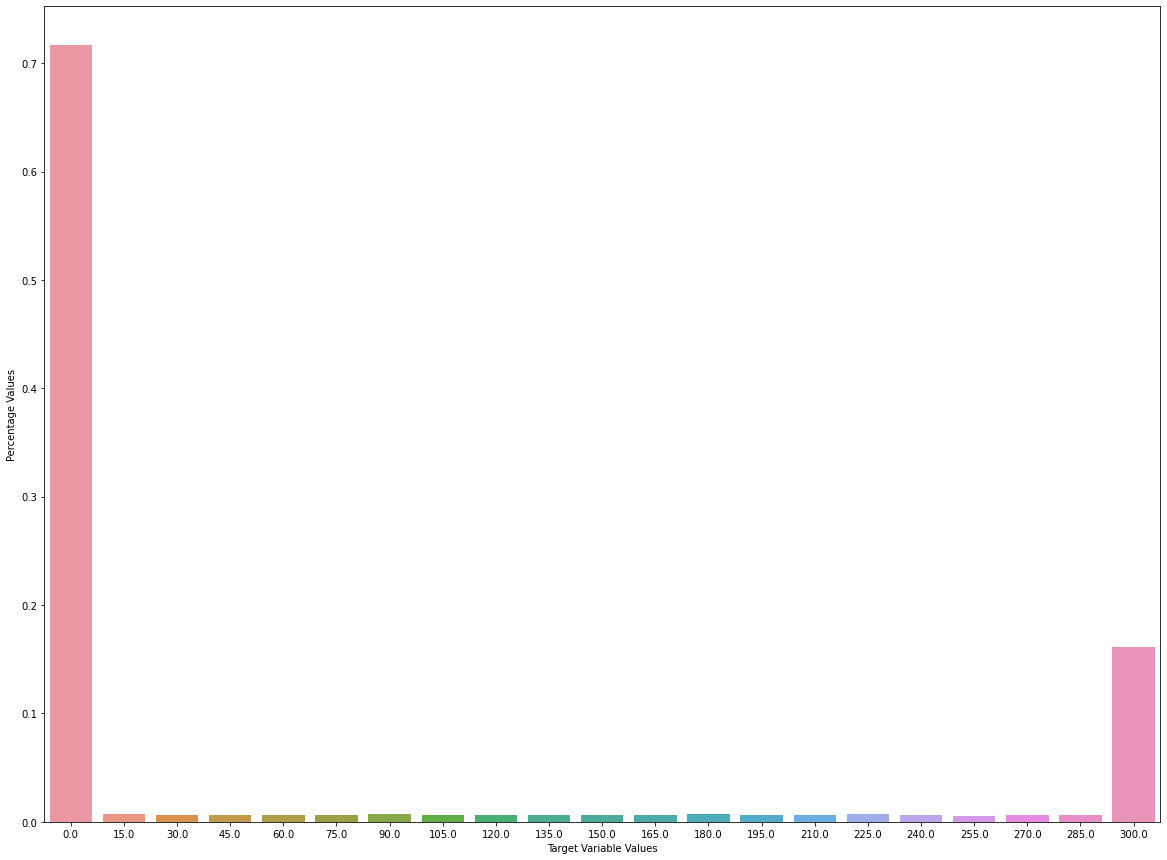

In [11]:
plt.figure(figsize = (20, 15))
ax = sns.barplot(x = house_data.auxHeat1.value_counts().index, y = house_data.auxHeat1.value_counts(normalize = True).values)
ax.set(xlabel = 'Target Variable Values', ylabel = 'Percentage Values')

[Text(0.5, 0, 'Target Variable Values')]

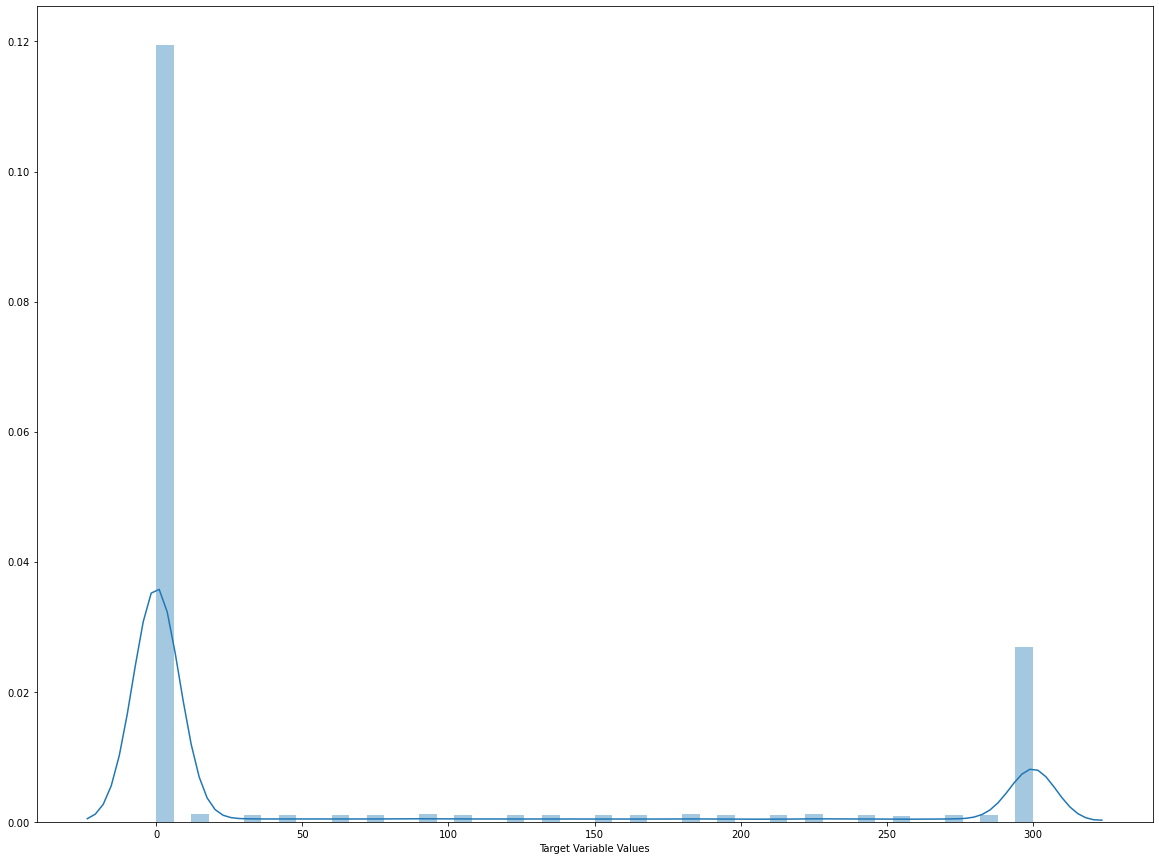

In [12]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_data.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

In [13]:
list(range(0, 13))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [14]:
len(house_data)

58837

In [15]:
start, end = 0, len(house_data)

cur = 0
ls = list()
step = 12
while start <= end - 12:
    cur = start + step
    print(cur)
    
    ls.append(list(range(start, cur)))
    
    start = cur

12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
240
252
264
276
288
300
312
324
336
348
360
372
384
396
408
420
432
444
456
468
480
492
504
516
528
540
552
564
576
588
600
612
624
636
648
660
672
684
696
708
720
732
744
756
768
780
792
804
816
828
840
852
864
876
888
900
912
924
936
948
960
972
984
996
1008
1020
1032
1044
1056
1068
1080
1092
1104
1116
1128
1140
1152
1164
1176
1188
1200
1212
1224
1236
1248
1260
1272
1284
1296
1308
1320
1332
1344
1356
1368
1380
1392
1404
1416
1428
1440
1452
1464
1476
1488
1500
1512
1524
1536
1548
1560
1572
1584
1596
1608
1620
1632
1644
1656
1668
1680
1692
1704
1716
1728
1740
1752
1764
1776
1788
1800
1812
1824
1836
1848
1860
1872
1884
1896
1908
1920
1932
1944
1956
1968
1980
1992
2004
2016
2028
2040
2052
2064
2076
2088
2100
2112
2124
2136
2148
2160
2172
2184
2196
2208
2220
2232
2244
2256
2268
2280
2292
2304
2316
2328
2340
2352
2364
2376
2388
2400
2412
2424
2436
2448
2460
2472
2484
2496
2508
2520
2532
2544
2556
2568
2580
2592
2604
2616
2

24012
24024
24036
24048
24060
24072
24084
24096
24108
24120
24132
24144
24156
24168
24180
24192
24204
24216
24228
24240
24252
24264
24276
24288
24300
24312
24324
24336
24348
24360
24372
24384
24396
24408
24420
24432
24444
24456
24468
24480
24492
24504
24516
24528
24540
24552
24564
24576
24588
24600
24612
24624
24636
24648
24660
24672
24684
24696
24708
24720
24732
24744
24756
24768
24780
24792
24804
24816
24828
24840
24852
24864
24876
24888
24900
24912
24924
24936
24948
24960
24972
24984
24996
25008
25020
25032
25044
25056
25068
25080
25092
25104
25116
25128
25140
25152
25164
25176
25188
25200
25212
25224
25236
25248
25260
25272
25284
25296
25308
25320
25332
25344
25356
25368
25380
25392
25404
25416
25428
25440
25452
25464
25476
25488
25500
25512
25524
25536
25548
25560
25572
25584
25596
25608
25620
25632
25644
25656
25668
25680
25692
25704
25716
25728
25740
25752
25764
25776
25788
25800
25812
25824
25836
25848
25860
25872
25884
25896
25908
25920
25932
25944
25956
25968
25980
25992
2600

46500
46512
46524
46536
46548
46560
46572
46584
46596
46608
46620
46632
46644
46656
46668
46680
46692
46704
46716
46728
46740
46752
46764
46776
46788
46800
46812
46824
46836
46848
46860
46872
46884
46896
46908
46920
46932
46944
46956
46968
46980
46992
47004
47016
47028
47040
47052
47064
47076
47088
47100
47112
47124
47136
47148
47160
47172
47184
47196
47208
47220
47232
47244
47256
47268
47280
47292
47304
47316
47328
47340
47352
47364
47376
47388
47400
47412
47424
47436
47448
47460
47472
47484
47496
47508
47520
47532
47544
47556
47568
47580
47592
47604
47616
47628
47640
47652
47664
47676
47688
47700
47712
47724
47736
47748
47760
47772
47784
47796
47808
47820
47832
47844
47856
47868
47880
47892
47904
47916
47928
47940
47952
47964
47976
47988
48000
48012
48024
48036
48048
48060
48072
48084
48096
48108
48120
48132
48144
48156
48168
48180
48192
48204
48216
48228
48240
48252
48264
48276
48288
48300
48312
48324
48336
48348
48360
48372
48384
48396
48408
48420
48432
48444
48456
48468
48480
4849

In [16]:
df1 = pd.DataFrame({"T_ctrl": [], 
                    "T_stp_heat": [], 
                    "T_out" : [], 
                    "RH_out" : [],
                    "auxHeat1" : []})

In [17]:
df2 = pd.DataFrame({"T_ctrl": [], 
                    "T_stp_heat": [], 
                    "T_out" : [], 
                    "RH_out" : [],
                    "auxHeat1" : []})

In [18]:
for i in ls:
    dummy, n = pd.DataFrame(house_data.iloc[i].sum()).T, len(i)
    print(n)
    dummy[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] = dummy[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] / n
    df2 = df2.append(dummy, ignore_index = True)

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

In [19]:
len(ls)

4903

In [20]:
len(df2)

4903

In [21]:
df2.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,70.0,70.0,41.5,95.5,960.0
1,70.0,70.0,42.0,94.0,1065.0
2,70.0,70.0,41.5,92.5,1575.0
3,70.0,70.0,38.5,89.5,1440.0
4,70.0,70.0,33.0,75.0,1800.0


In [22]:
house_df = df2.copy()

In [23]:
house_df.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,70.0,70.0,41.5,95.5,960.0
1,70.0,70.0,42.0,94.0,1065.0
2,70.0,70.0,41.5,92.5,1575.0
3,70.0,70.0,38.5,89.5,1440.0
4,70.0,70.0,33.0,75.0,1800.0


[Text(0.5, 0, 'Target Variable Values')]

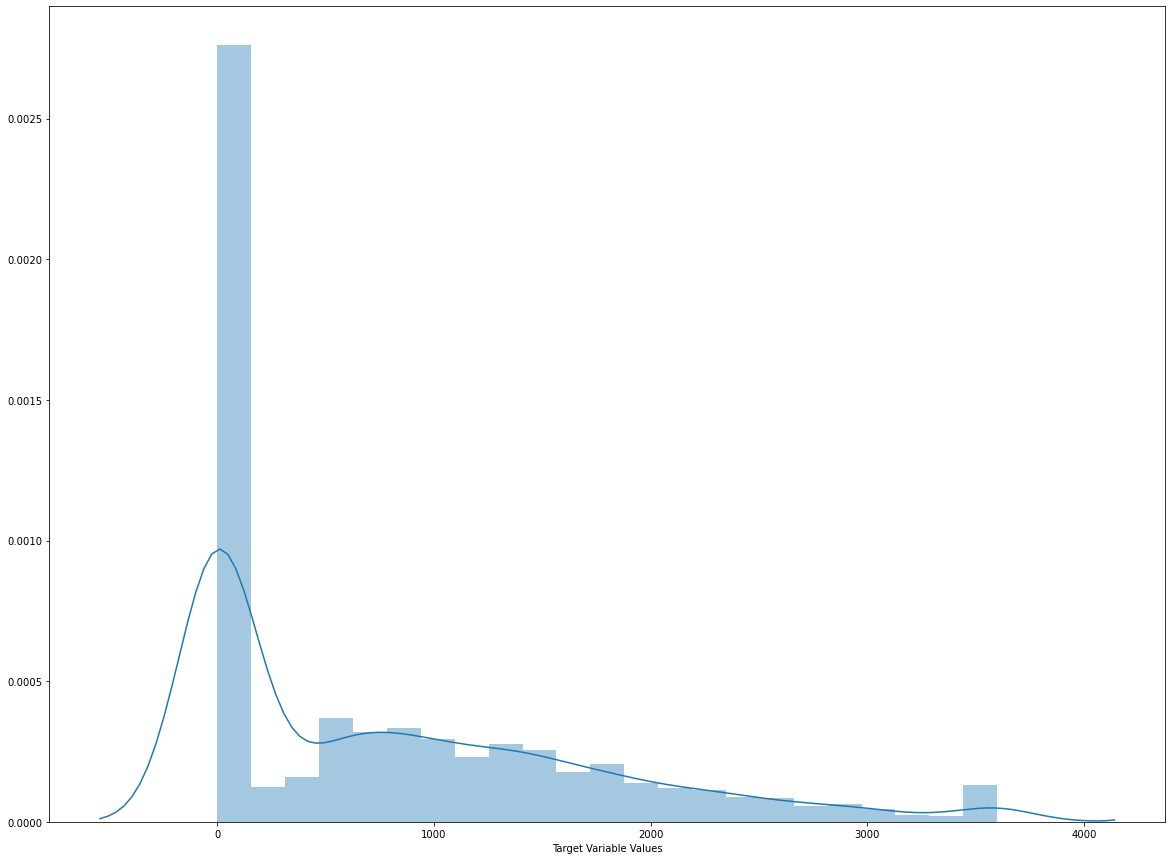

In [24]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_df.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

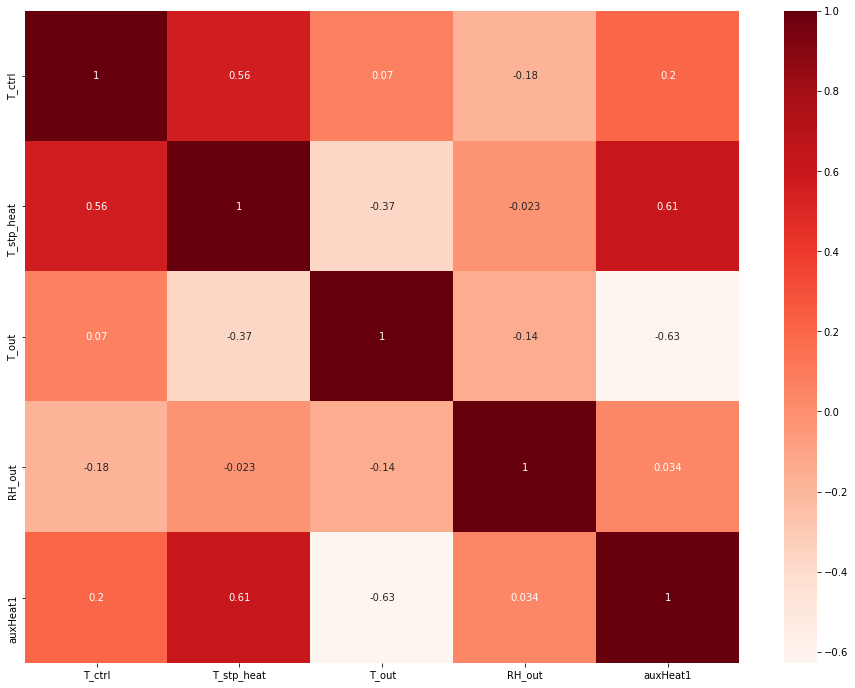

In [25]:
plt.figure(figsize = (16,12))
cor = house_df.corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

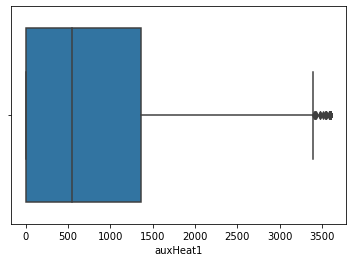

In [26]:
sns.boxplot(house_df.auxHeat1)

In [27]:
Q1 = house_df.auxHeat1.quantile(0.25)
Q3 = house_df.auxHeat1.quantile(0.75)
IQR = Q3 - Q1

In [28]:
((house_df.auxHeat1 < (Q1 - 1.5 * IQR)) | (house_df.auxHeat1 > (Q3 + 1.5 * IQR))).sum()

105

In [29]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(house_df))
print(z)

[[0.31592343 0.67555905 0.04209645 1.86445299 0.17421222]
 [0.31592343 0.67555905 0.07508157 1.75968822 0.28669082]
 [0.31592343 0.67555905 0.04209645 1.65492345 0.83301545]
 ...
 [0.31592343 0.67555905 0.77703409 0.52579203 0.07780199]
 [0.31592343 0.67555905 0.72755641 0.29298143 0.14207547]
 [0.31592343 0.67555905 0.65059112 0.07951553 0.09387036]]


In [30]:
threshold = 3
print(np.where(z > 3))

(array([  95,  123,  176,  227,  295,  296,  297,  343,  352,  368,  369,
        370,  371,  372,  373,  374,  375,  376,  380,  387,  390,  453,
        454,  457,  478,  496,  511,  513,  541,  542,  543,  545,  546,
        547,  547,  548,  548,  549,  549,  561,  562,  563,  570,  571,
        572,  586,  626,  725,  740,  768,  769,  770,  791,  810,  829,
        930,  931, 1055, 1056, 1200, 1415, 1573, 1574, 1675, 1688, 1704,
       1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801,
       1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812,
       1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823,
       1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1852,
       1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
       1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874,
       1875, 1876, 1877, 1878, 1879, 1880, 1881, 1

In [31]:
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

T_ctrl           2.916667
T_stp_heat       7.333333
T_out           20.750000
RH_out          21.166667
auxHeat1      1357.500000
dtype: float64


In [32]:
house_df_o = house_df[(z < 3).all(axis=1)]

In [33]:
house_df.shape

(4903, 5)

In [34]:
house_df_o.shape

(4677, 5)

In [35]:
house_df_out = house_df[~((house_df < (Q1 - 1.5 * IQR)) | (house_df > (Q3 + 1.5 * IQR))).any(axis = 1)]
house_df_out.shape

(4571, 5)

In [36]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from neupy import algorithms

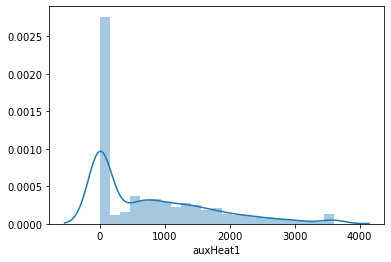

In [37]:
sns.distplot(house_df.auxHeat1)

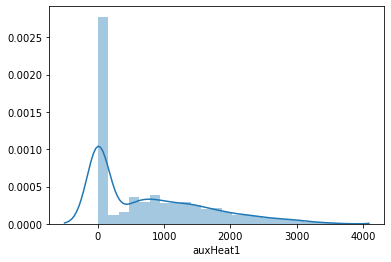

In [38]:
sns.distplot(house_df_o.auxHeat1)

[Text(0.5, 0, 'Target Variable Values')]

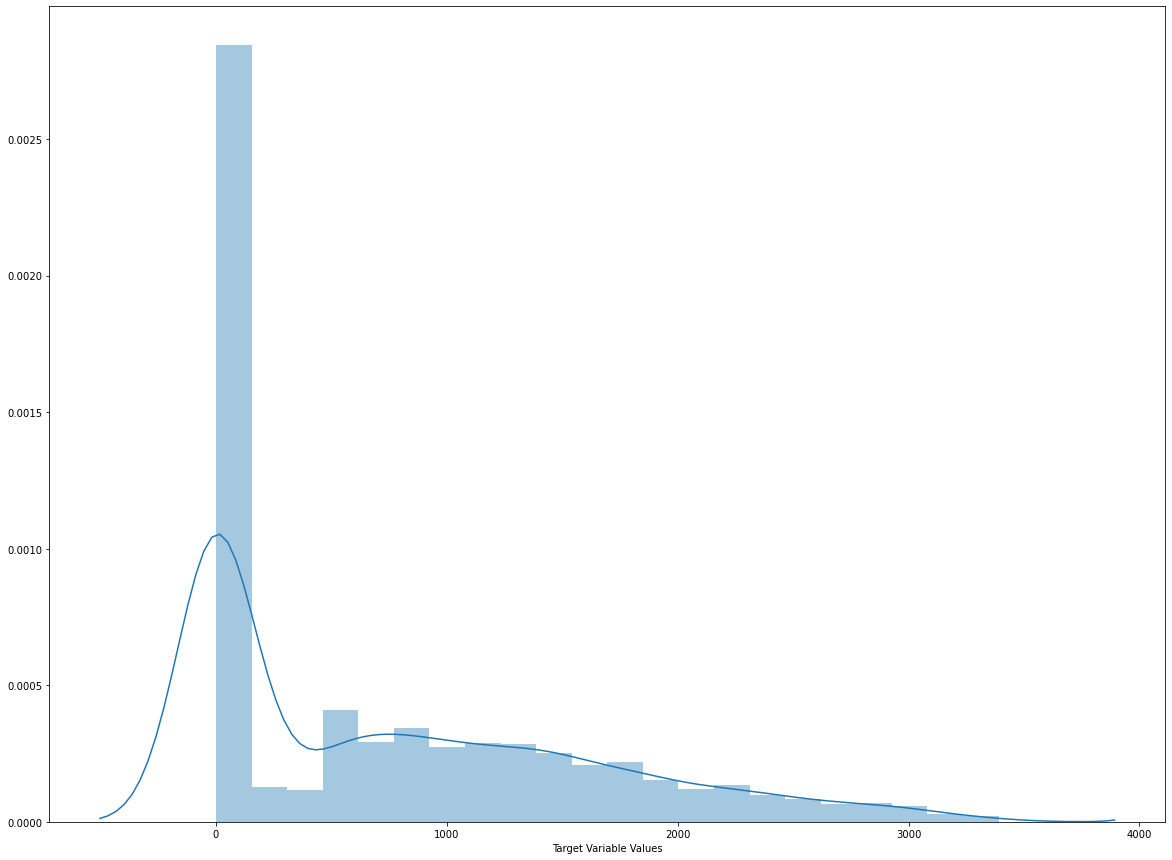

In [39]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_df_out.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

In [40]:
def f(row):
    if row['auxHeat1'] == 0.0:
        val = 0
    else:
        val = 1
    return val

In [41]:
house_df_out['label'] = house_df_out.apply(f, axis = 1)

In [42]:
house_df_out.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1,label
0,70.0,70.0,41.5,95.5,960.0,1
1,70.0,70.0,42.0,94.0,1065.0,1
2,70.0,70.0,41.5,92.5,1575.0,1
3,70.0,70.0,38.5,89.5,1440.0,1
4,70.0,70.0,33.0,75.0,1800.0,1


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

In [45]:
house_df_out[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] = sc.fit_transform(house_df_out[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']])

In [46]:
house_df_out_1 = house_df_out[house_df_out['label'] == 1]

In [47]:
X, y = house_df_out.drop(labels = ['auxHeat1', 'label'], axis = 1), house_df_out[['auxHeat1', 'label']]

In [48]:
y.head()

,auxHeat1,label
0,960.0,1
1,1065.0,1
2,1575.0,1
3,1440.0,1
4,1800.0,1


In [49]:
y = y.values

In [50]:
y[:, 1]

array([1., 1., 1., ..., 1., 1., 1.])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
X_train.shape

(3656, 4)

In [53]:
X_train

,T_ctrl,T_stp_heat,T_out,RH_out
1087,0.253226,0.662586,-0.855927,0.168020
1245,0.253226,0.662586,-0.093650,-0.649428
4843,-2.672371,-0.917366,-0.485999,1.326561
4542,0.253226,0.662586,-0.418739,0.020997
3530,-0.401184,-1.400130,0.455638,1.891129
...,...,...,...,...
81,-1.402046,-1.444017,-0.351479,0.973706
1076,0.253226,0.662586,-0.345874,-0.696475
404,0.253226,0.662586,-0.642938,-0.202478
3021,-0.208710,-1.444017,1.722363,-0.884665


In [54]:
y_train.shape

(3656, 2)

In [55]:
y_train[:,1]

array([1., 0., 1., ..., 1., 0., 1.])

In [56]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train[:, 1], validation_data = (X_test, y_test[:, 1]), batch_size = 16, epochs = 200, shuffle = True)

Epoch 1/200
229/229 [==============================] - 1s 4ms/step - loss: 0.5755 - accuracy: 0.7560 - val_loss: 0.3775 - val_accuracy: 0.8656
Epoch 2/200
229/229 [==============================] - 1s 4ms/step - loss: 0.3230 - accuracy: 0.8668 - val_loss: 0.3121 - val_accuracy: 0.8721
Epoch 3/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2920 - accuracy: 0.8805 - val_loss: 0.2957 - val_accuracy: 0.8754
Epoch 4/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2813 - accuracy: 0.8879 - val_loss: 0.2868 - val_accuracy: 0.8798
Epoch 5/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2757 - accuracy: 0.8917 - val_loss: 0.2912 - val_accuracy: 0.8798
Epoch 6/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2738 - accuracy: 0.8911 - val_loss: 0.2805 - val_accuracy: 0.8896
Epoch 7/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2712 - accuracy: 0.8952 - val_loss: 0.2805 - val_accuracy: 0.8831

Epoch 58/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2555 - accuracy: 0.9024 - val_loss: 0.2712 - val_accuracy: 0.8951
Epoch 59/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2554 - accuracy: 0.9018 - val_loss: 0.2730 - val_accuracy: 0.8984
Epoch 60/200
229/229 [==============================] - 1s 3ms/step - loss: 0.2555 - accuracy: 0.9018 - val_loss: 0.2700 - val_accuracy: 0.8973
Epoch 61/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2558 - accuracy: 0.9024 - val_loss: 0.2696 - val_accuracy: 0.8907
Epoch 62/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2549 - accuracy: 0.9002 - val_loss: 0.2670 - val_accuracy: 0.8984
Epoch 63/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2545 - accuracy: 0.9032 - val_loss: 0.2713 - val_accuracy: 0.8951
Epoch 64/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2550 - accuracy: 0.9015 - val_loss: 0.2757 - val_accuracy:

Epoch 115/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2487 - accuracy: 0.9045 - val_loss: 0.2700 - val_accuracy: 0.8918
Epoch 116/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2495 - accuracy: 0.9056 - val_loss: 0.2679 - val_accuracy: 0.8951
Epoch 117/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2490 - accuracy: 0.9054 - val_loss: 0.2663 - val_accuracy: 0.8940
Epoch 118/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2495 - accuracy: 0.9051 - val_loss: 0.2709 - val_accuracy: 0.8951
Epoch 119/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2479 - accuracy: 0.9040 - val_loss: 0.2776 - val_accuracy: 0.8929
Epoch 120/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2490 - accuracy: 0.9059 - val_loss: 0.2719 - val_accuracy: 0.8995
Epoch 121/200
229/229 [==============================] - 1s 4ms/step - loss: 0.2491 - accuracy: 0.9043 - val_loss: 0.2704 - val_ac

In [57]:
house_df_out_1.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1,label
0,0.253226,0.662586,0.018449,1.891129,960.0,1
1,0.253226,0.662586,0.052079,1.785273,1065.0,1
2,0.253226,0.662586,0.018449,1.679416,1575.0,1
3,0.253226,0.662586,-0.183330,1.467703,1440.0,1
4,0.253226,0.662586,-0.553258,0.444423,1800.0,1


In [58]:
X, y = house_df_out_1.drop(labels = ['auxHeat1', 'label'], axis = 1), house_df_out_1[['auxHeat1', 'label']]

In [59]:
y = y.values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [61]:
y_train.shape

(2107, 2)

In [62]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'normal', activation = 'relu', input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train[:, 0], validation_data = (X_test, y_test[:, 0]), batch_size = 16, epochs = 200, shuffle = True)

Epoch 1/200
132/132 [==============================] - 1s 4ms/step - loss: 1301.8187 - mse: 2239018.0000 - val_loss: 1299.9618 - val_mse: 2238459.7500
Epoch 2/200
132/132 [==============================] - 0s 4ms/step - loss: 1298.2808 - mse: 2228456.7500 - val_loss: 1291.7592 - val_mse: 2213615.0000
Epoch 3/200
132/132 [==============================] - 0s 4ms/step - loss: 1282.4872 - mse: 2180783.0000 - val_loss: 1265.9022 - val_mse: 2135735.0000
Epoch 4/200
132/132 [==============================] - 0s 4ms/step - loss: 1245.2632 - mse: 2069979.1250 - val_loss: 1214.3807 - val_mse: 1985349.2500
Epoch 5/200
132/132 [==============================] - 0s 4ms/step - loss: 1179.7958 - mse: 1884429.1250 - val_loss: 1130.3074 - val_mse: 1752889.1250
Epoch 6/200
132/132 [==============================] - 0s 4ms/step - loss: 1080.8552 - mse: 1619621.7500 - val_loss: 1011.0166 - val_mse: 1452059.7500
Epoch 7/200
132/132 [==============================] - 0s 4ms/step - loss: 948.3864 - mse: 130

132/132 [==============================] - 0s 3ms/step - loss: 385.4118 - mse: 285463.6562 - val_loss: 382.0469 - val_mse: 277755.4688
Epoch 112/200
132/132 [==============================] - 0s 3ms/step - loss: 385.3810 - mse: 285769.3438 - val_loss: 381.9846 - val_mse: 277613.6875
Epoch 113/200
132/132 [==============================] - 0s 3ms/step - loss: 385.1768 - mse: 285399.1562 - val_loss: 381.8907 - val_mse: 277419.4375
Epoch 114/200
132/132 [==============================] - 0s 3ms/step - loss: 385.1763 - mse: 285095.5625 - val_loss: 381.8760 - val_mse: 277423.6562
Epoch 115/200
132/132 [==============================] - 0s 3ms/step - loss: 384.9202 - mse: 284654.0625 - val_loss: 381.8378 - val_mse: 277165.7500
Epoch 116/200
132/132 [==============================] - 0s 3ms/step - loss: 384.8128 - mse: 284603.2188 - val_loss: 381.6968 - val_mse: 277003.0312
Epoch 117/200
132/132 [==============================] - 0s 3ms/step - loss: 384.7374 - mse: 284429.5625 - val_loss: 381

132/132 [==============================] - 0s 3ms/step - loss: 380.1476 - mse: 276754.8438 - val_loss: 378.6342 - val_mse: 271417.2812
Epoch 167/200
132/132 [==============================] - 0s 3ms/step - loss: 380.0474 - mse: 276476.5938 - val_loss: 378.6046 - val_mse: 271307.4062
Epoch 168/200
132/132 [==============================] - 0s 3ms/step - loss: 379.8417 - mse: 276277.8438 - val_loss: 378.5493 - val_mse: 271297.4375
Epoch 169/200
132/132 [==============================] - 0s 3ms/step - loss: 379.7857 - mse: 276141.9062 - val_loss: 378.4942 - val_mse: 271121.2500
Epoch 170/200
132/132 [==============================] - 0s 3ms/step - loss: 379.5923 - mse: 276057.0000 - val_loss: 378.4040 - val_mse: 271099.5938
Epoch 171/200
132/132 [==============================] - 0s 3ms/step - loss: 379.5930 - mse: 275915.4375 - val_loss: 378.3551 - val_mse: 270999.8125
Epoch 172/200
132/132 [==============================] - 0s 3ms/step - loss: 379.4659 - mse: 275738.5625 - val_loss: 378

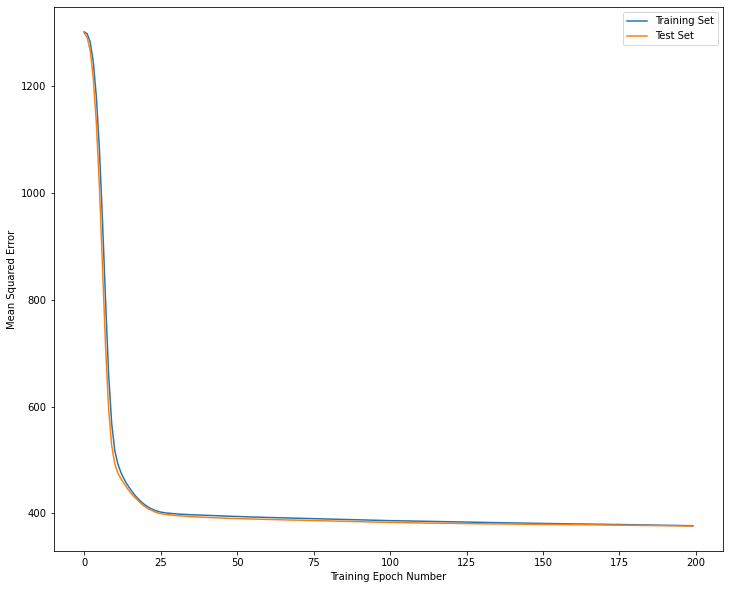

In [70]:
plt.figure(figsize = (12, 10))
plt.plot(history.history['loss'], label = 'Training Set')
plt.plot(history.history['val_loss'], label = 'Test Set')
plt.legend()
plt.xlabel("Training Epoch Number")
plt.ylabel("Mean Squared Error")
plt.show()

In [116]:
y_predicted = classifier.predict(X_test)

In [117]:
from sklearn.metrics import mean_absolute_error

In [120]:
mean_absolute_error(y_test[:, 0], y_predicted)

365.58929203764535

In [125]:
y_test[2][0]

450.0

In [126]:
y_predicted[2]

array([363.52014], dtype=float32)

In [ ]:
for i in range(len(y_predicted)):
    if int(np.absolute(y_predicted[i])) == 0:
        y_predicted[i] = 0

In [ ]:
y_predicted[2]

In [ ]:
mean_absolute_error(y_test, y_predicted)

In [ ]:
mean_squared_error(y_test, y_predicted)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_predicted))

In [127]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [128]:
house_df_out_1

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1,label
0,0.253226,0.662586,0.018449,1.891129,960.0,1
1,0.253226,0.662586,0.052079,1.785273,1065.0,1
2,0.253226,0.662586,0.018449,1.679416,1575.0,1
3,0.253226,0.662586,-0.183330,1.467703,1440.0,1
4,0.253226,0.662586,-0.553258,0.444423,1800.0,1
...,...,...,...,...,...,...
4896,0.253226,0.662586,-0.553258,0.226829,765.0,1
4897,0.253226,0.662586,-0.553258,0.232710,825.0,1
4900,0.253226,0.662586,-0.816692,0.538518,870.0,1
4901,0.253226,0.662586,-0.766248,0.303281,930.0,1


In [129]:
reframed = series_to_supervised(house_df_out_1, 2, 1)

In [130]:
reframed

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
2,0.253226,0.662586,0.018449,1.891129,960.0,1.0,0.253226,0.662586,0.052079,1.785273,1065.0,1.0,0.253226,0.662586,0.018449,1.679416,1575.0,1
3,0.253226,0.662586,0.052079,1.785273,1065.0,1.0,0.253226,0.662586,0.018449,1.679416,1575.0,1.0,0.253226,0.662586,-0.183330,1.467703,1440.0,1
4,0.253226,0.662586,0.018449,1.679416,1575.0,1.0,0.253226,0.662586,-0.183330,1.467703,1440.0,1.0,0.253226,0.662586,-0.553258,0.444423,1800.0,1
5,0.253226,0.662586,-0.183330,1.467703,1440.0,1.0,0.253226,0.662586,-0.553258,0.444423,1800.0,1.0,0.253226,0.662586,-0.654148,0.373852,1470.0,1
6,0.253226,0.662586,-0.553258,0.444423,1800.0,1.0,0.253226,0.662586,-0.654148,0.373852,1470.0,1.0,0.253226,0.662586,-0.654148,0.267995,1200.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4896,0.253226,0.662586,-0.592493,0.303281,735.0,1.0,0.214732,0.662586,-0.558863,0.168020,855.0,1.0,0.253226,0.662586,-0.553258,0.226829,765.0,1
4897,0.214732,0.662586,-0.558863,0.168020,855.0,1.0,0.253226,0.662586,-0.553258,0.226829,765.0,1.0,0.253226,0.662586,-0.553258,0.232710,825.0,1
4900,0.253226,0.662586,-0.553258,0.226829,765.0,1.0,0.253226,0.662586,-0.553258,0.232710,825.0,1.0,0.253226,0.662586,-0.816692,0.538518,870.0,1
4901,0.253226,0.662586,-0.553258,0.232710,825.0,1.0,0.253226,0.662586,-0.816692,0.538518,870.0,1.0,0.253226,0.662586,-0.766248,0.303281,930.0,1


In [131]:
reframed.drop(labels = ['var6(t-2)', 'var6(t-1)', 'var6(t)'], axis = 1, inplace = True)

In [132]:
y_auxHeat = reframed['var5(t)']

In [133]:
X = reframed.drop(labels = ["var5(t)"], axis = 1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y_auxHeat, test_size = 0.2, shuffle = True)

In [135]:
X_train = X_train.values
X_test = X_test.values

In [136]:
y_train = y_train.values

In [137]:
y_test = y_test.values

In [138]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2105, 14) (2105,) (527, 14) (527,)


In [139]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'normal', activation = 'relu', input_dim = 14))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 200, shuffle = True)

Epoch 1/200
66/66 [==============================] - 0s 5ms/step - loss: 1292.3611 - mean_absolute_error: 1292.3611 - val_loss: 1279.3256 - val_mean_absolute_error: 1279.3256
Epoch 2/200
66/66 [==============================] - 0s 4ms/step - loss: 1161.4785 - mean_absolute_error: 1161.4785 - val_loss: 982.6662 - val_mean_absolute_error: 982.6662
Epoch 3/200
66/66 [==============================] - 0s 4ms/step - loss: 711.7696 - mean_absolute_error: 711.7696 - val_loss: 460.4003 - val_mean_absolute_error: 460.4003
Epoch 4/200
66/66 [==============================] - 0s 3ms/step - loss: 489.8104 - mean_absolute_error: 489.8104 - val_loss: 447.8368 - val_mean_absolute_error: 447.8368
Epoch 5/200
66/66 [==============================] - 0s 4ms/step - loss: 488.1982 - mean_absolute_error: 488.1982 - val_loss: 446.9336 - val_mean_absolute_error: 446.9336
Epoch 6/200
66/66 [==============================] - 0s 4ms/step - loss: 487.9384 - mean_absolute_error: 487.9384 - val_loss: 446.1303 - va

Epoch 49/200
66/66 [==============================] - 0s 3ms/step - loss: 480.4041 - mean_absolute_error: 480.4041 - val_loss: 443.1965 - val_mean_absolute_error: 443.1965
Epoch 50/200
66/66 [==============================] - 0s 3ms/step - loss: 481.4109 - mean_absolute_error: 481.4109 - val_loss: 445.0496 - val_mean_absolute_error: 445.0496
Epoch 51/200
66/66 [==============================] - 0s 3ms/step - loss: 480.3192 - mean_absolute_error: 480.3192 - val_loss: 440.9837 - val_mean_absolute_error: 440.9837
Epoch 52/200
66/66 [==============================] - 0s 3ms/step - loss: 480.9181 - mean_absolute_error: 480.9181 - val_loss: 441.3386 - val_mean_absolute_error: 441.3386
Epoch 53/200
66/66 [==============================] - 0s 3ms/step - loss: 480.4200 - mean_absolute_error: 480.4200 - val_loss: 440.9697 - val_mean_absolute_error: 440.9697
Epoch 54/200
66/66 [==============================] - 0s 4ms/step - loss: 480.6277 - mean_absolute_error: 480.6277 - val_loss: 441.6276 - va

66/66 [==============================] - 0s 3ms/step - loss: 477.3853 - mean_absolute_error: 477.3853 - val_loss: 437.2341 - val_mean_absolute_error: 437.2341
Epoch 144/200
66/66 [==============================] - 0s 4ms/step - loss: 476.2790 - mean_absolute_error: 476.2790 - val_loss: 438.5750 - val_mean_absolute_error: 438.5750
Epoch 145/200
66/66 [==============================] - 0s 4ms/step - loss: 476.3649 - mean_absolute_error: 476.3649 - val_loss: 436.9997 - val_mean_absolute_error: 436.9997
Epoch 146/200
66/66 [==============================] - 0s 5ms/step - loss: 476.5678 - mean_absolute_error: 476.5678 - val_loss: 437.5428 - val_mean_absolute_error: 437.5428
Epoch 147/200
66/66 [==============================] - 0s 4ms/step - loss: 476.2596 - mean_absolute_error: 476.2596 - val_loss: 436.7951 - val_mean_absolute_error: 436.7951
Epoch 148/200
66/66 [==============================] - 0s 4ms/step - loss: 476.2588 - mean_absolute_error: 476.2588 - val_loss: 436.7828 - val_mean_a

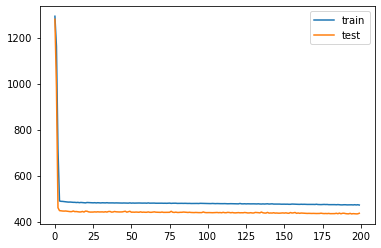

In [140]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [141]:
from sklearn.metrics import mean_squared_error

In [142]:
y_predicted = classifier.predict(X_test)

In [143]:
mean_squared_error(y_test, y_predicted)

386015.07548915094

In [144]:
np.sqrt(mean_squared_error(y_test, y_predicted))

621.3011149910733